In [ ]:
class Node:
    def __init__(self, key):  # define constructor
        self.left = None
        self.right = None
        self.item = key

class BST:
    def __init__(self):  # define constructor
        self.root = None

    def insert(self, key):  # insert method
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert(self.root, key)

    def _insert(self, current_node, key):  # insert method helper
        if key < current_node.item:
            if current_node.left is None:
                current_node.left = Node(key)
            else:
                self._insert(current_node.left, key)
        elif key >= current_node.item:
            if current_node.right is None:
                current_node.right = Node(key)
            else:
                self._insert(current_node.right, key)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, current_node, key):
        if current_node is None or current_node.item == key:
            return current_node
        if key < current_node.item:
            return self._search(current_node.left, key)
        return self._search(current_node.right, key)

    def print_inorder(self, root):
      if root:
        self.print_inorder(root.left)
        print(root.item, end= ' ')
        self.print_inorder(root.right)

    def count_nodes(self, root):
      if root is None:
        return 0
      left = self.count_nodes(root.left)
      right = self.count_nodes(root.right)
      return 1 + left + right

    def count_nodes_even(self, root):
      if root is None:
        return 0
      left = self.count_nodes_even(root.left)
      right = self.count_nodes_even(root.right)
      if root.item % 2 == 0:
        return 1 + left + right
      return left + right

    def count_nodes_odd(self, root):
      if root is None:
        return 0
      left = self.count_nodes_odd(root.left)
      right = self.count_nodes_odd(root.right)
      if root.item % 2 == 1:
        return 1 + left + right
      return left + right

    def height(self, root):
      if root is None:
        return -1
      left = self.height(root.left)
      right = self.height(root.right)
      return 1 + max(left, right)

    def num_nodes_at_depth(self, root, d):
      if root is None:
        return 0
      if d == 0:
        return 1
      left = self.num_nodes_at_depth(root.left, d- 1)
      right = self.num_nodes_at_depth(root.right, d -1)
      return left + right

    def count_less(self, root, key):
      if root is None:
        return 0
      if root.item < key:
        return 1 + self.count_less(root.left, key) + self.count_less(root.right, key)
      return self.count_less(root.left, key)

    def count_leaves(self, root):
        if root is None:
            return 0
        if root.left is None and root.right is None:
            return 1
        return self.count_leaves(root.left) + self.count_leaves(root.right)

    def count_key(self, root, key):
      if root is None:
        return 0
      count_left = self.count_key(root.left, key)
      count_right = self.count_key(root.right, key)
      if root.item == key:
        return 1 + count_left + count_right
      return count_left + count_right



def main():
    bst = BST()

    # Test insertions
    bst.insert(15)
    bst.insert(25)
    bst.insert(5)
    bst.insert(45)
    bst.insert(50)
    bst.insert(35)
    bst.insert(3)
    bst.insert(2)
    bst.insert(4)
    bst.insert(1)

    print("In-Order Traversal:")
    bst.print_inorder(bst.root)
    print("Counting Nodes in BST with variations")
    print("The number of nodes in tree:", bst.count_nodes(bst.root))
    print("The number of even nodes in tree:", bst.count_nodes_even(bst.root))
    print("The number of even nodes in tree:", bst.count_nodes_odd(bst.root))
    print("The height of the tree is:", bst.height(bst.root))
    print("Counting Nodes at the specified depth in BST:", bst.num_nodes_at_depth(bst.root, d=2))
    print("Counting Leaves within BST", bst.count_leaves(bst.root))
    print("Counting Keys less than given key", bst.count_less(bst.root, key = 30))
    print("Counting Keys:", bst.count_key(bst.root, key = 30))





if __name__ == "__main__":
    main()


In-Order Traversal:
1 2 3 4 5 15 25 35 45 50 Counting Nodes in BST with variations
The number of nodes in tree: 10
The number of even nodes in tree: 3
The number of even nodes in tree: 7
The height of the tree is: 4
Counting Nodes at the specified depth in BST: 2
Counting Leaves within BST 4
Counting Keys less than given key 7
Counting Keys: 0


In [30]:
#******************************************************************************
#DO NOT MODIFY THE CODE BELOW
#******************************************************************************
import matplotlib.pyplot as plt
class BTreeNode:
    # Constructor
    def __init__(self, keys=None, children=None, is_leaf=True, max_num_keys=5):
        if keys is None:
            keys = []
        if children is None:
            children = []
        self.keys = keys
        self.children = children
        self.is_leaf = is_leaf
        if max_num_keys < 3:  # max_num_keys must be odd and >= 3
            max_num_keys = 3
        if max_num_keys % 2 == 0:  # max_num_keys must be odd
            max_num_keys += 1
        self.max_num_keys = max_num_keys

    def is_full(self):
        return len(self.keys) >= self.max_num_keys

    def promote(self):
        middle_index = len(self.keys) // 2
        middle_key = self.keys[middle_index]

        left_child = BTreeNode(
            self.keys[:middle_index],
            self.children[:middle_index+1],
            self.is_leaf, self.max_num_keys
            )
        right_child = BTreeNode(
            self.keys[middle_index+1:],
            self.children[middle_index+1:],
            self.is_leaf,
            self.max_num_keys
            )

        return middle_key, left_child, right_child

class BTree:

    # Constructor
    def __init__(self, max_num_keys=5):
        self.max_num_keys = max_num_keys
        self.root = BTreeNode(max_num_keys=max_num_keys)

    def insert(self, key):
        root = self.root
        if root.is_full():
            middle_key, left_child, right_child = root.promote()
            promoted_root = BTreeNode([middle_key], [left_child, right_child], False, self.max_num_keys)
            self.root = promoted_root
            self._insert_unfilled(promoted_root, key)
        else:
            self._insert_unfilled(root, key)

    def _insert_unfilled(self, node, key):
        if node.is_leaf:
            node.keys.append(key)
            node.keys.sort()
        else:
            index = 0
            while index < len(node.keys) and key > node.keys[index]:
                index += 1

            if node.children[index].is_full():
                middle_key, left_child, right_child = node.children[index].promote()
                node.keys.insert(index, middle_key)
                node.children[index] = left_child
                node.children.insert(index + 1, right_child)

                if key > middle_key:
                    index += 1

            self._insert_unfilled(node.children[index], key)

              # Code to draw trees
    def leaves(self):
        return self._leaves(self.root)

    def _leaves(self, node):
        if node.is_leaf:
            return [node.keys]
        s = []
        for c in node.children:
            s = s + self._leaves(c)
        return s

    def _set_x(self, dx, node=None):
        if node is None:
            node = self.root
        if node.is_leaf:
            return
        else:
            for c in node.children:
                self._set_x(dx, c)
            d = (dx[node.children[0].keys[0]] + dx[node.children[-1].keys[0]] + 10 * len(node.children[-1].keys)) / 2
            dx[node.keys[0]] = d - 10 * len(node.keys) / 2

    def _draw_btree(self, dx, y, y_inc, fs, ax, node):
        xs = dx[node.keys[0]]
        if node.is_leaf:
            for itm in node.keys:
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(itm), ha="center", va="center", fontsize=fs)
                xs += 10
        else:
            for i in range(len(node.keys)):
                xc = dx[node.children[i].keys[0]] + 5 * len(node.children[i].keys)
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(node.keys[i]), ha="center", va="center", fontsize=fs)
                ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
                self._draw_btree(dx, y - y_inc, y_inc, fs, ax, node.children[i])
                xs += 10
            xc = dx[node.children[-1].keys[0]] + 5 * len(node.children[-1].keys)
            ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
            self._draw_btree(dx, y - y_inc, y_inc, fs, ax, node.children[-1])

    def draw(self):
        if self.root is None:
          print("<Empty Tree>")
          return
        ll = self.leaves()
        dx = {}
        d = 0
        for l in ll:
            dx[l[0]] = d
            d += 10 * (len(l) + 1)
        self._set_x(dx)
        fig, ax = plt.subplots()
        self._draw_btree(dx, 0, 30, 10, ax, self.root)
        ax.set_aspect(1.0)
        ax.axis('off')
        plt.show()

    def height(self):
        return self._height(self.root)

    # --------------------------------------------------------------------------------------------------------------
    # Problem 1
    # --------------------------------------------------------------------------------------------------------------
    def _height(self, node):
      # Base Case 1: Empty tree
      if node is None:
        return -1

      # Base Case 2: Leaf node
      if node.is_leaf:
        return 0
      # Recursive Case
      max_height = -1
      for child in node.children:
        child_height = self._height(child)
        if child_height > max_height:
          max_height = child_height
      return 1 + max_height
    # --------------------------------------------------------------------------------------------------------------

    def num_nodes_at_depth(self, d):
        return self._num_nodes_at_depth(d, self.root)

    # --------------------------------------------------------------------------------------------------------------
    # Problem 2
    # --------------------------------------------------------------------------------------------------------------
    def _num_nodes_at_depth(self, d, node):
        # Base Case 1: Empty tree
        if node is None:
          return 0

        # Base Case 2: Leaf node
        if node.is_leaf and d == 0:
          return 1

        # Recursive Case
        count = 0
        if d > 0:
          for child in node.children:
            count += self._num_nodes_at_depth(d-1, child)
        return count

    # --------------------------------------------------------------------------------------------------------------

    def max_val_at_depth(self, d):
        return self._max_val_at_depth(d, self.root)

    # --------------------------------------------------------------------------------------------------------------
    # Problem 3
    # --------------------------------------------------------------------------------------------------------------
    def _max_val_at_depth(self, d, node):
      # Base Case 1: Check if depth exceeds the height of tree or if it's an empty tree
      if node is None or d < 0:
        return None

      # Base Case 2: At the current target depth
      if d == 0:
        return node.keys[-1]

      # Recursive case
      max_val = None
      for child in node.children:
        val = self._max_val_at_depth(d-1, child)
        if val is not None:
          if max_val is None or val > max_val:
            max_val = val
      return max_val

    def search(self, k):
        return self._search(k, self.root)

    # --------------------------------------------------------------------------------------------------------------
    # Problem 4
    # --------------------------------------------------------------------------------------------------------------
    def _search(self, k, node):
        # Base Case: Check if empty
        if node is None:
          return False

        # Check if the key is in the current node's keys
        if k in node.keys:
          return True

        # Base case: If it's a leaf node and the key isn't found, return False
        if node.is_leaf:
          return False

        # Recursive case: Find the appropriate child to traverse
        for child_index, child_key in enumerate(node.keys):
          if k < child_key:
            return self._search(k, node.children[child_index])

        # Check that node.children[child_index] is a valid node
        if node.children[child_index + 1] is not None:
          return self._search(k, node.children[child_index + 1])

        return False

    # Helper function to find the correct child node to traverse based on key
    def _find_child(self, node, k):
        # Iterate through the keys to find where the key fits
        for i in range(len(node.keys)):
            if k < node.keys[i]:
                return node.children[i]
        return node.children[-1]

        # If no such key is found, return the last child (rightmost)
        return node.children[-1]


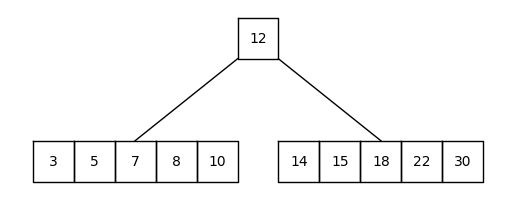

The height of the B-Tree is: 1
The number of nodes at this current depth is: 2
The highest value at the current depthis:  30
The value: 15 is in the tree.


In [31]:
# Create an instance of the BTree with a max number of keys set to 5
btree = BTree(max_num_keys=5)

# Insert values into the BTree
values = [15, 8, 22, 5, 12, 18, 30, 3, 7, 10, 14]
for value in values:
    btree.insert(value)

# Draw the BTree structure
btree.draw()

#Test your code here
search_key = 15  # Set the search key for testing
is_in_tree = btree.search(search_key)


print("The height of the B-Tree is:", btree.height())
print("The number of nodes at this current depth is:", btree.num_nodes_at_depth(1))
print("The highest value at the current depthis: ", btree.max_val_at_depth(1))
print(f"The value: {search_key} is {'in' if is_in_tree else 'not in'} the tree.")

#Feel free to make different trees
